# Find Stock and Commodity Price Trends Using LOWESS (Locally Weighted Scatterplot Smoothing)

# From statisticshowto.com 
SOURCE: https://www.statisticshowto.com/lowess-smoothing

<b>LOWESS (Locally Weighted Scatterplot Smoothing)</b>, sometimes called LOESS (locally weighted smoothing), is a popular tool used in regression analysis that creates a smooth line through a timeplot or scatter plot to help you to see relationship between variables and foresee trends.

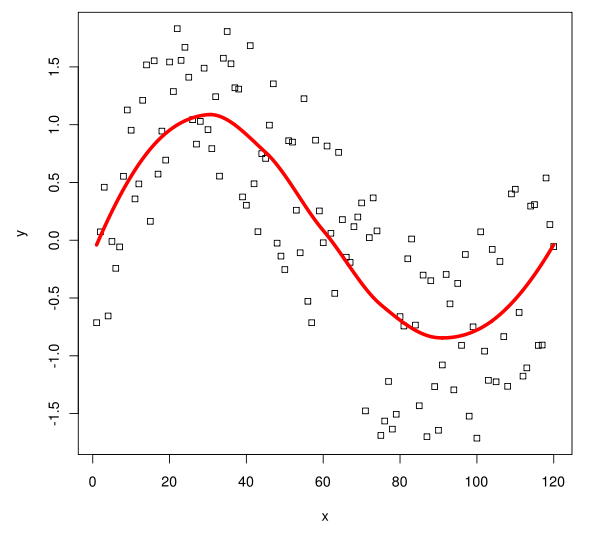

### What is Lowess Smoothing used for?

- Fitting a line to a scatter plot or time plot where noisy data values, sparse data points or weak interrelationships interfere with your ability to see a line of best fit.
- Linear regression where least squares fitting doesn’t create a line of good fit or is too labor-intensive to use.
- Data exploration and analysis in the social sciences (ex. particularly in elections and voting behavior.)

### Youtube Video Explanation of LOESS smoothing. 
https://www.youtube.com/watch?v=Vf7oJ6z2LCc

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm   
import datetime as dt

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
import seaborn as sns

from pandas_datareader import data

# Download and plot closing stock prices

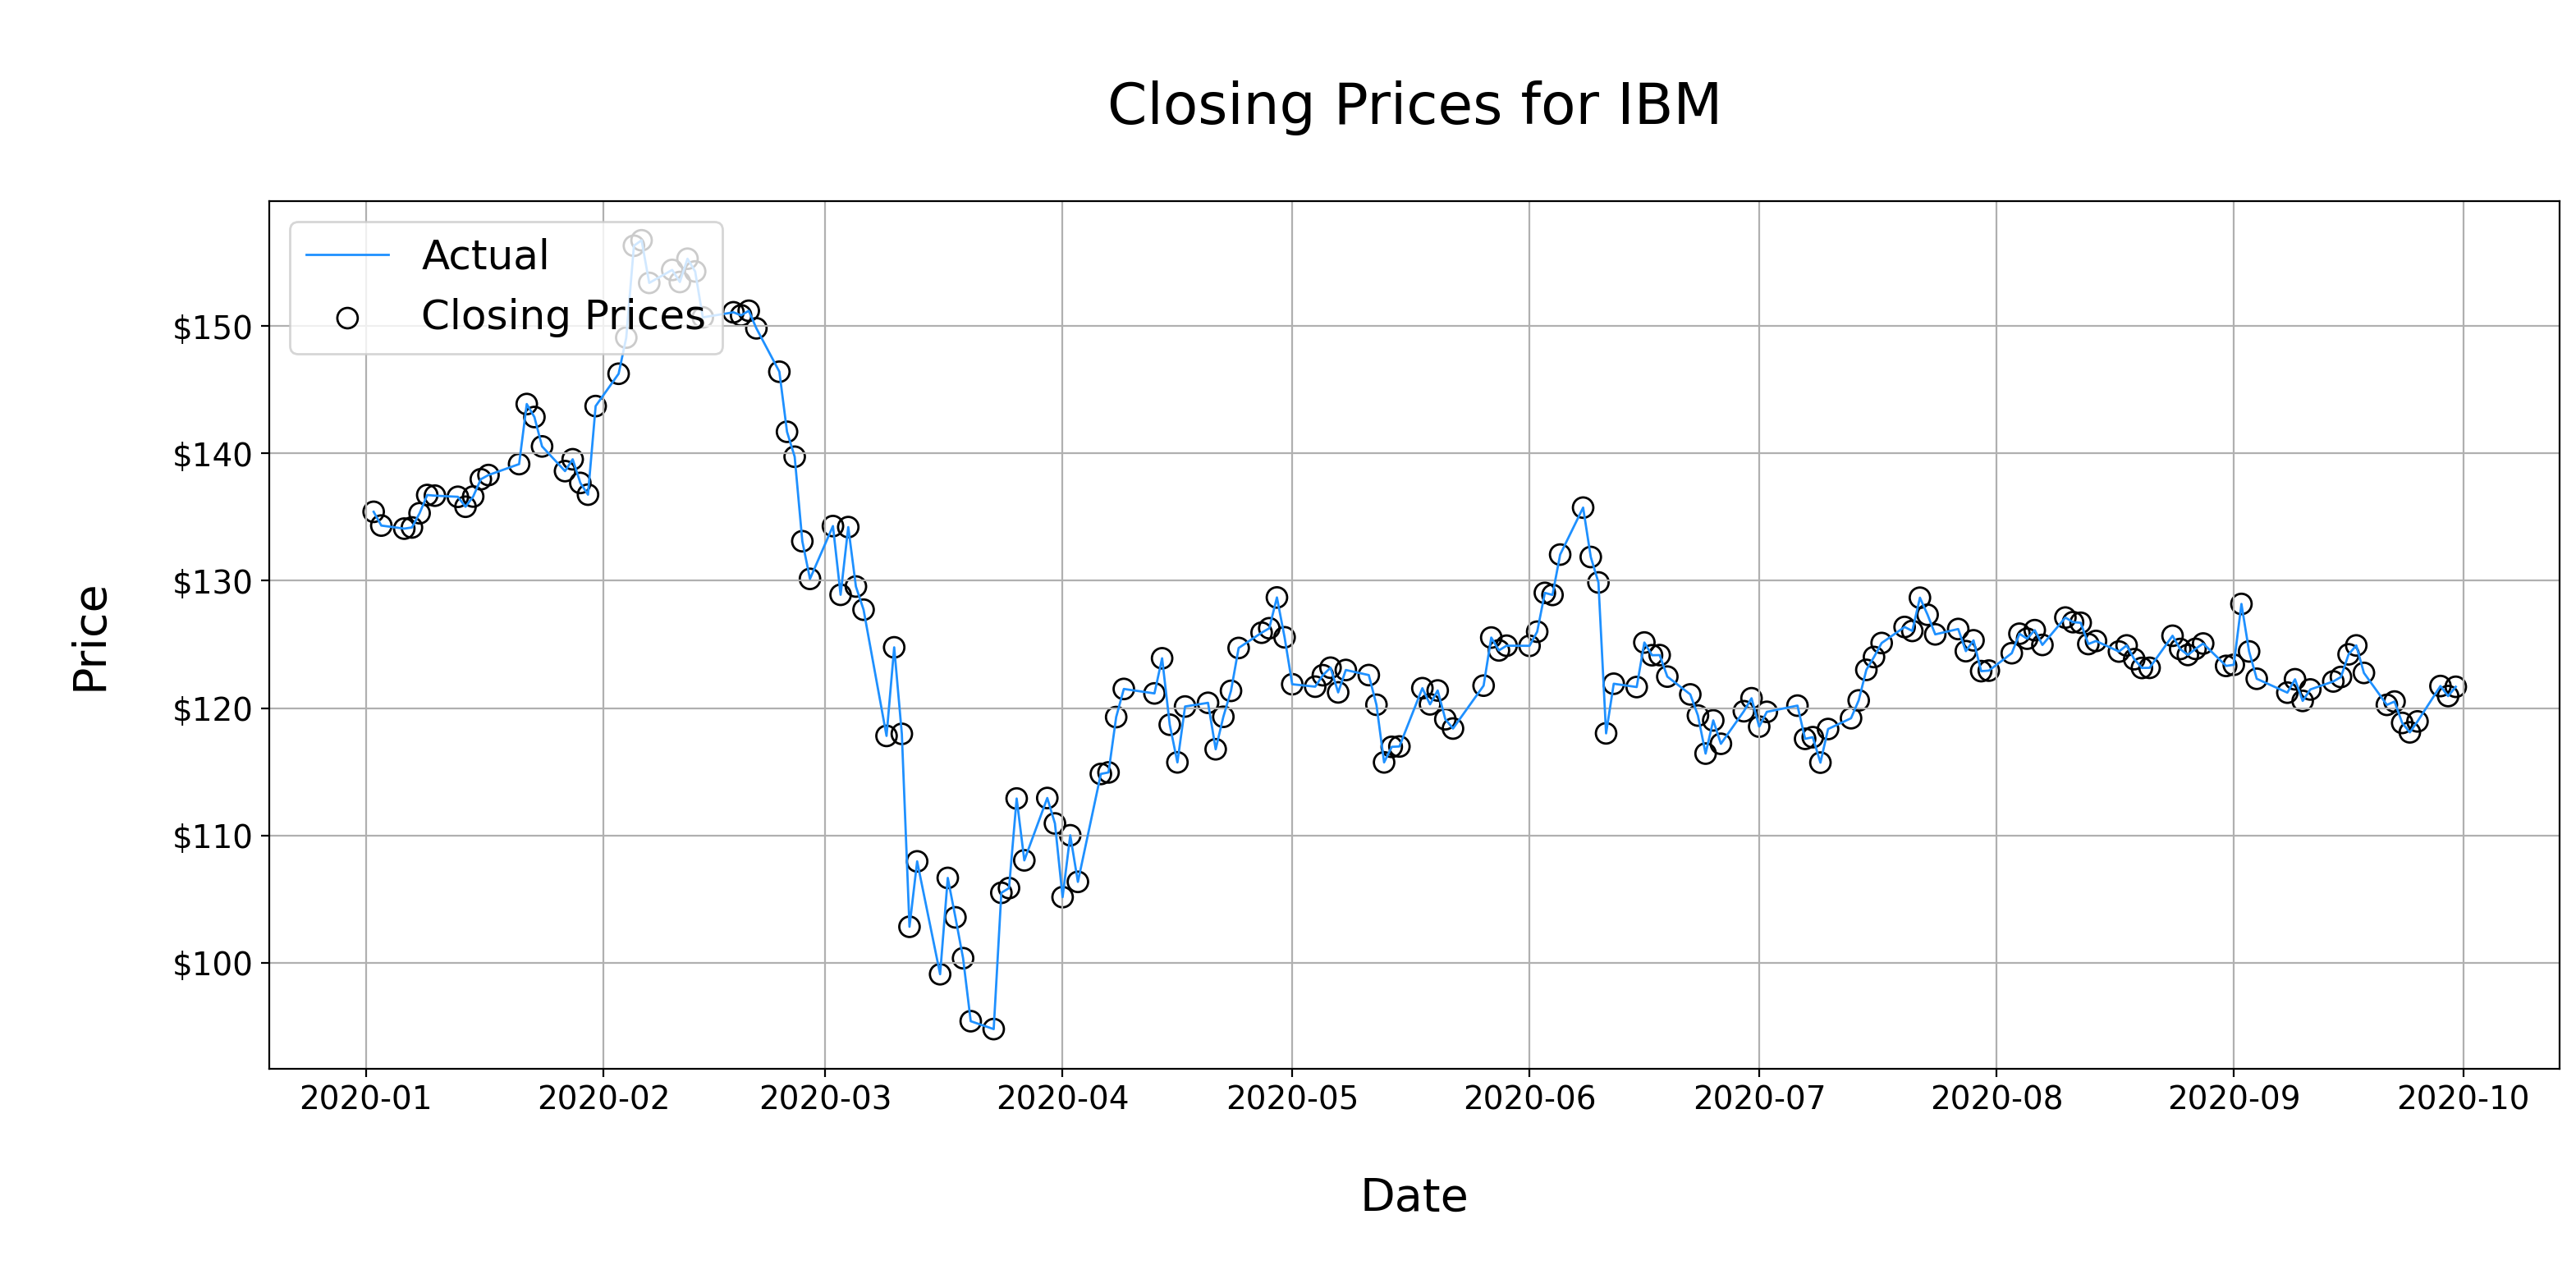

In [2]:
company = 'IBM'
source = 'yahoo'

start=dt.datetime(2020, 1, 1)
end=dt.datetime(2020, 9, 30)

closing_prices = data.DataReader(company, source, start, end)['Close']
dates = closing_prices.index

plt.style.context('ggplot')
fig, ax = plt.subplots(figsize = (18,7), dpi = 200)

fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.tick_params(axis='y', labelsize = 14)
ax.tick_params(axis='x', labelsize = 14)

ax.set_title('\nClosing Prices for {}\n'.format(company), fontsize = 25)
ax.set_xlabel('\nDate\n', fontsize = 20)
ax.set_ylabel('\nPrice\n', fontsize = 20)

ax.scatter(dates, closing_prices, facecolors='none', edgecolors='black', linewidth = 1, s = 80, label = 'Closing Prices')
ax.plot(dates, closing_prices, color = 'dodgerblue', linewidth = 1, alpha = 1, label = 'Actual')

ax.grid(which = 'major')
plt.legend(loc = 2, fontsize = 18)
plt.show()

# Use a LOWESS smoother from Statsmodels to find the trend
Source: https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html

### LOWESS smoothing function

In [3]:
def smooth_lowess(y_series, lowess_window_length = 100, smoothing_iterations = 2):
    
    """
    This is a customized LOWESS (locally weighted scatterplot smoothing) implementation that "smooths" a discrete data set.  
    In the LOWESS, each smoothed value is given by a weighted linear least squares regression over the span.  
    
    This implementation uses an upstream process to account for missing and zero values and data series that can't have negative values.  
    It also allows for a finite window length above 3, rather than a percentage of the total dataset.   
    
    It uses the statstmodels implementation:
    statsmodels.nonparametric.smoothers_lowess.lowess
    source: https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
    
    Params:
    
    y_series:  Pandas series of discrete points as the inputs variable y
    lowess_window_length:  This is the window length passed smoothed through the data set. It cannot be less than 3. 
    smoothing_iterations: number of times to iterate the smoother
    
    Returns:
    yhat: a Pandas series of the smoothed values.
    """
    
    import statsmodels.api as sm
    
    y_series = y_series.fillna(0) # replace all NaN values with 0
    x_series = list(np.arange(0,len(y_series),1))
    
    window = lowess_window_length/len(x_series)
    
    
    lowess = sm.nonparametric.lowess
    smooth = lowess(y_series, x_series, frac = window, it = smoothing_iterations)
    index, yhat = np.transpose(smooth)
    
    return yhat

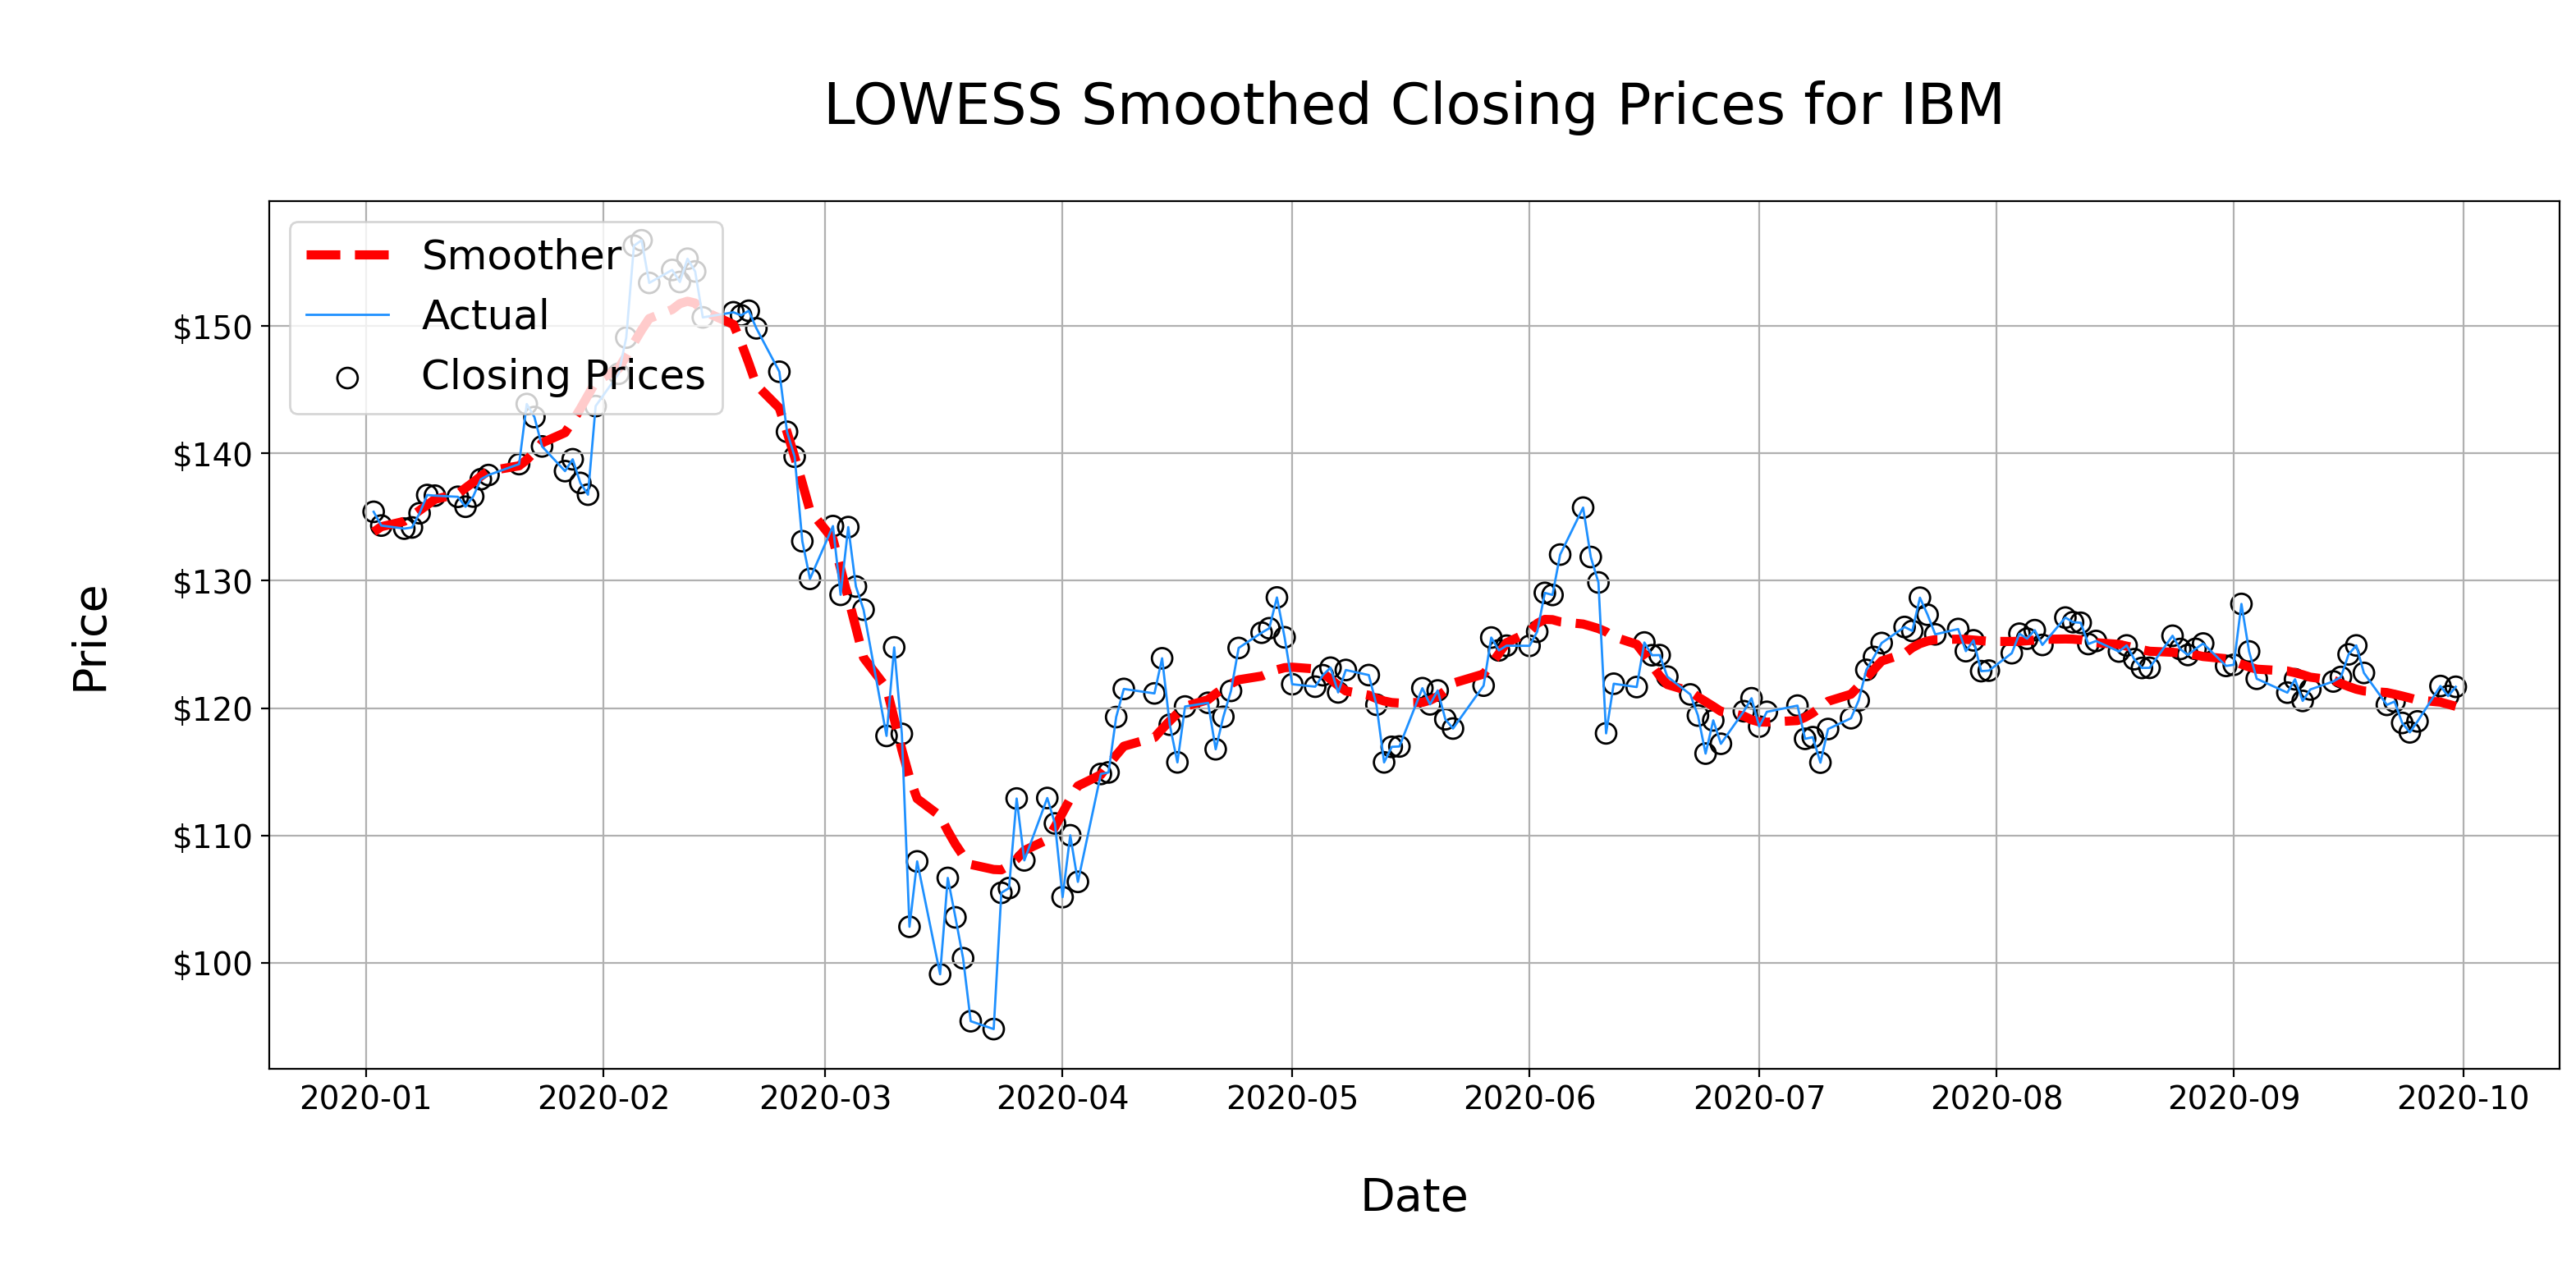

In [4]:
smoothed_prices = smooth_lowess(closing_prices, lowess_window_length = 21)

company = 'IBM'
source = 'yahoo'

start=dt.datetime(2020, 1, 1)
end=dt.datetime(2020, 9, 30)

closing_prices = data.DataReader(company, source, start, end)['Close']
dates = closing_prices.index

plt.style.context('ggplot')
fig, ax = plt.subplots(figsize = (18,7), dpi = 200)

fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.tick_params(axis='y', labelsize = 14)
ax.tick_params(axis='x', labelsize = 14)

ax.set_title('\nLOWESS Smoothed Closing Prices for {}\n'.format(company), fontsize = 25)
ax.set_xlabel('\nDate\n', fontsize = 20)
ax.set_ylabel('\nPrice\n', fontsize = 20)

ax.scatter(dates, closing_prices, facecolors='none', edgecolors='black', linewidth = 1, s = 80, label = 'Closing Prices')
ax.plot(dates, smoothed_prices, color = 'red', linestyle = '--', linewidth = 4, label = 'Smoother')
ax.plot(dates, closing_prices, color = 'dodgerblue', linewidth = 1, alpha = 1, label = 'Actual')

ax.grid(which = 'major')
plt.legend(loc = 2, fontsize = 18)
plt.show()